In [33]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [34]:
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480934843.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480936523.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480942388.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480945041.h5'
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480945624.h5'

In [35]:
h = katdal.open(filename)

In [36]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480945624.h5 (version 3.0)
Observer: Moloko  Experiment ID: 20161205-0027
Description: 'Generic Phaseup for all targets'
Observed from 2016-12-05 15:47:07.879 SAST to 2016-12-05 15:51:43.762 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m006,m007,m008,m010,m014,m015,m025,m031,m062,m063  20      220
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm010', 'm007', 'm014', 'm006', 'm063', 'm015', 'm025', 'm031', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (69 dumps, 4096 channels, 220 correlation produc

In [37]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  12
    cal_product_K  ---  12
    cal_product_G  ---  24


In [38]:
np.set_printoptions(precision=4,suppress=True)

In [39]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V136">
[['m006', 'm007', 'm008', 'm010', 'm014', 'm015', 'm025', 'm031', 'm062', 'm063']]
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031' 'm062' 'm063']


# Delays

In [40]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [41]:
k_array.shape #Times,Pols,Antennas

(12, 2, 10)

In [42]:
# print delays (if there are few delays)
print 'POL 0: \n', k_0[0], "\n",k_0[-1]
print 'POL 1: \n', k_1[0],"\n" ,k_1[-1]

POL 0: 
[-386.2034 -407.8095 -378.331  -389.2747 -385.8544 -385.8327    0.
  234.1503 -376.5577 -383.1784] 
[-386.1751 -407.8207 -378.3    -389.2384 -385.8326 -385.8111    0.      234.191
 -376.5688 -383.1904]
POL 1: 
[-383.0977 -404.8654 -374.5868 -382.8334 -381.0209 -382.869     0.
  238.1399 -377.1473 -380.2541] 
[-383.0993 -404.877  -374.5703 -382.814  -381.0127 -382.859     0.
  238.1747 -377.1672 -380.2494]


In [43]:
print labels

['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031' 'm062' 'm063']


In [44]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

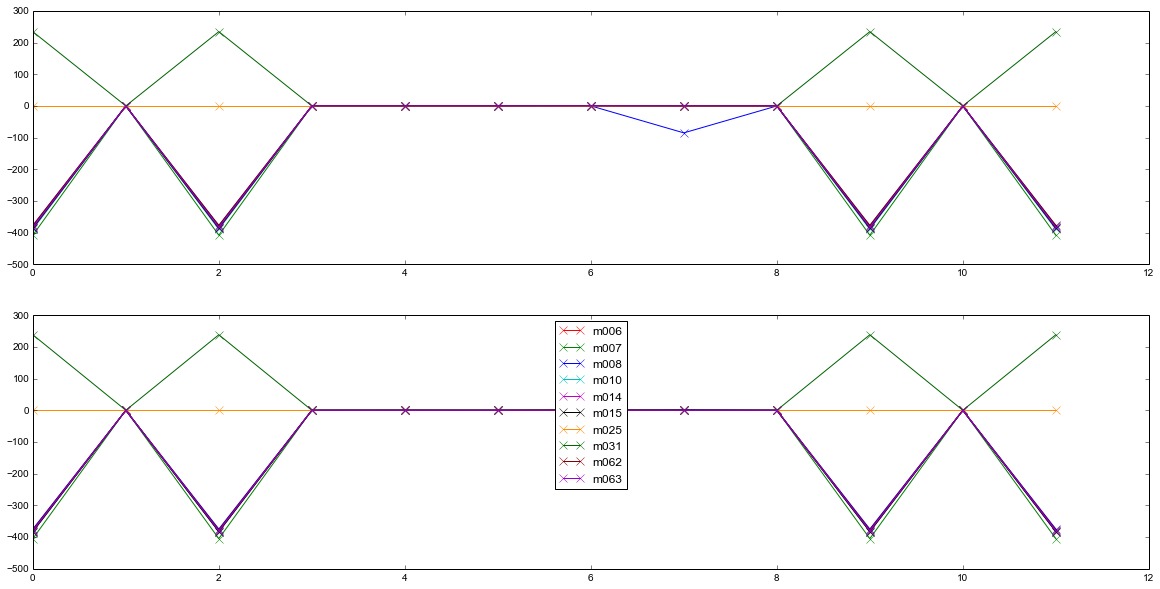

In [45]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [46]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(24, 2, 10)


In [47]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 0.9995  0.9998  0.9988  0.9993  0.9999  1.0011  1.0007  1.0001  1.0002
  1.0002]
[ 0.9992  1.0009  1.0009  1.001   1.0008  1.0022  0.9977  0.9982  1.
  1.0004]


In [48]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 0.9999  0.9977  0.997   1.0041  1.0038  1.      1.0032  0.9991  0.9983
  1.0003]
[ 0.999   0.9977  1.0012  1.0025  1.0028  1.0019  1.0003  0.9991  1.0005
  1.002 ]


In [49]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 1.0005  0.9978  0.9982  1.0048  1.0039  0.9989  1.0025  0.999   0.9981
  1.0001]
[ 0.9997  0.9968  1.0004  1.0015  1.002   0.9997  1.0026  1.0009  1.0004
  1.0016]


In [50]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[  72.8563   72.3971  123.4408   76.2017  145.4412   79.0559    0.       13.336
  143.0001  101.1385]
[  48.8021   86.2423   88.6083   87.0781   77.2128   58.1999    0.
   59.3618   73.5716  109.5601]


In [51]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[  53.1673   71.1498  114.1178   51.3044  131.2438   65.9778    0.
   -2.6299  131.0566  102.8774]
[  43.5102   86.2821   74.8529   69.2253   70.6036   51.1322    0.
   44.1659   65.8252  102.7321]


In [52]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[-19.689   -1.2473  -9.323  -24.8974 -14.1973 -13.0781   0.     -15.966
 -11.9435   1.7389]
[ -5.2919   0.0397 -13.7555 -17.8528  -6.6092  -7.0677   0.     -15.1959
  -7.7464  -6.8279]


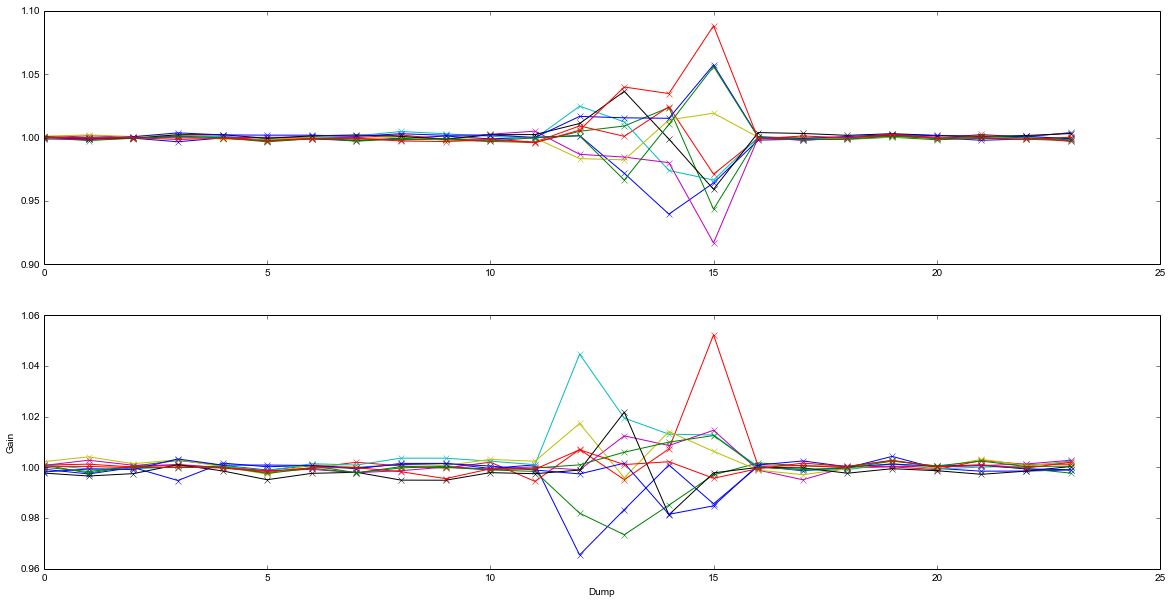

In [53]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

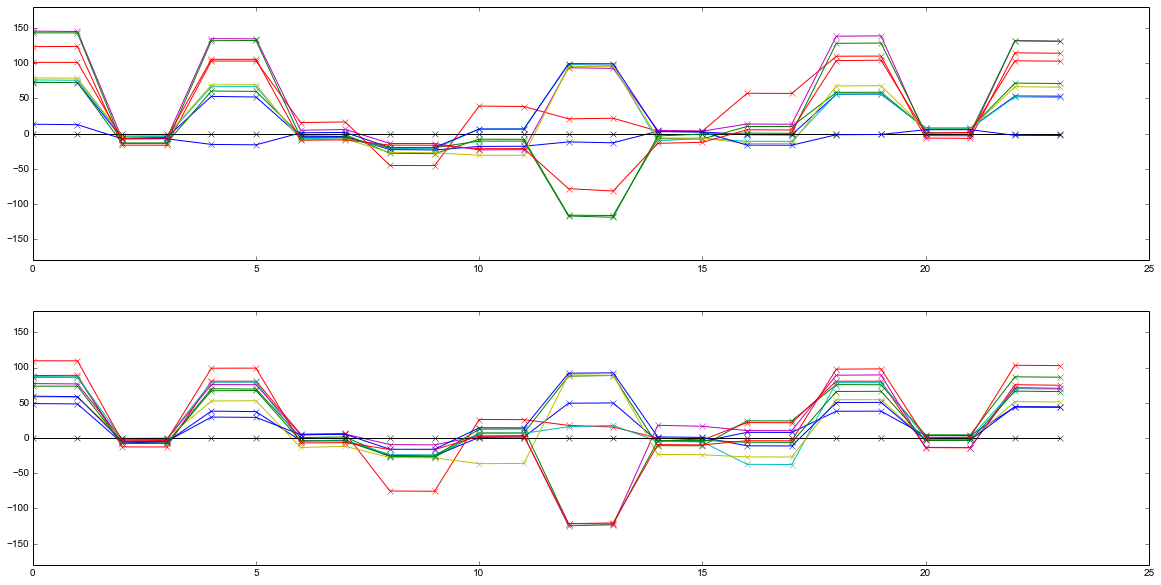

In [54]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [55]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(12, 4096, 2, 10)


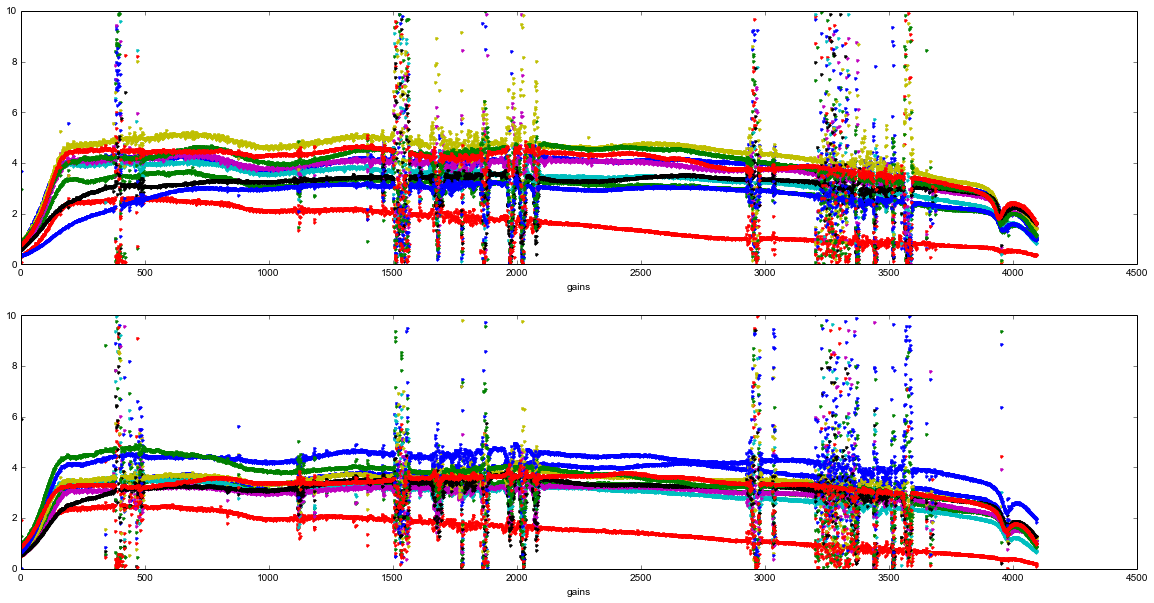

In [56]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

In [57]:
""""
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')
"""

'"\nfor i in range(len(labels)):\n    ax[0].plot(k_0[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[0].set_ylim([-0.2,0.2]);\n    ax[1].plot(k_1[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[1].set_ylim([-0.2,0.2]);\nplt.legend(loc=\'upper center\')\n'

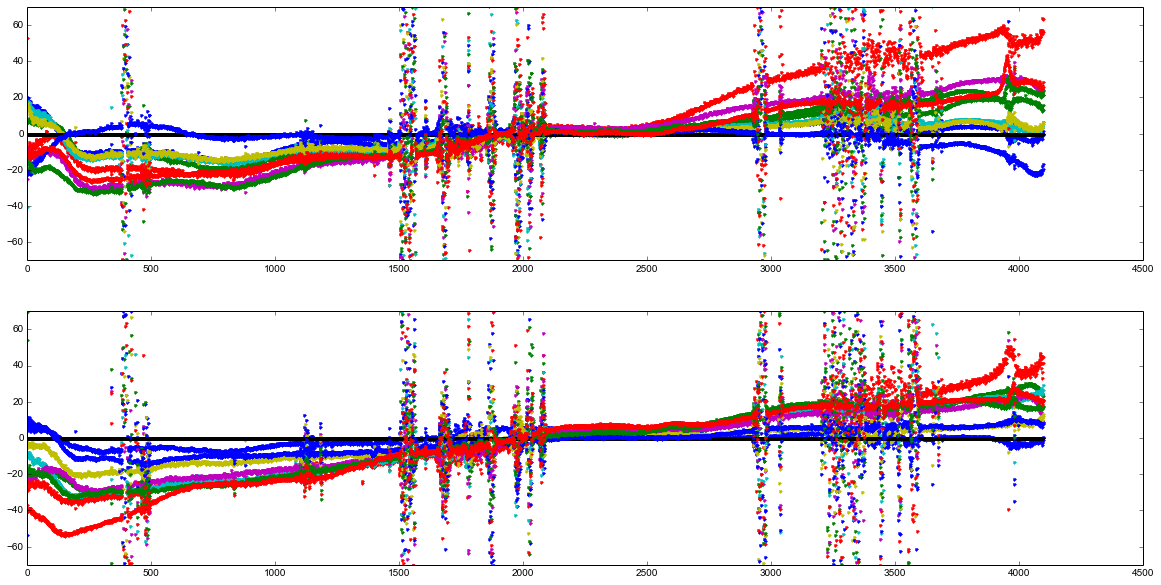

In [58]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].set_ylim([-70,70]);
ax[1].set_ylim([-70,70]);
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
plt.legend()

In [59]:
len(labels)

10

In [60]:
b_array.shape
# Time,channels,pols,antennas

(12, 4096, 2, 10)

In [61]:
#One bandpass at the END
antn=9
b_0_1 = b_array[-1,:,0,antn]
b_1_1 = b_array[-1,:,1,antn]
print b_1_1.shape
print a_array[:,antn]

(4096,)
['m063']


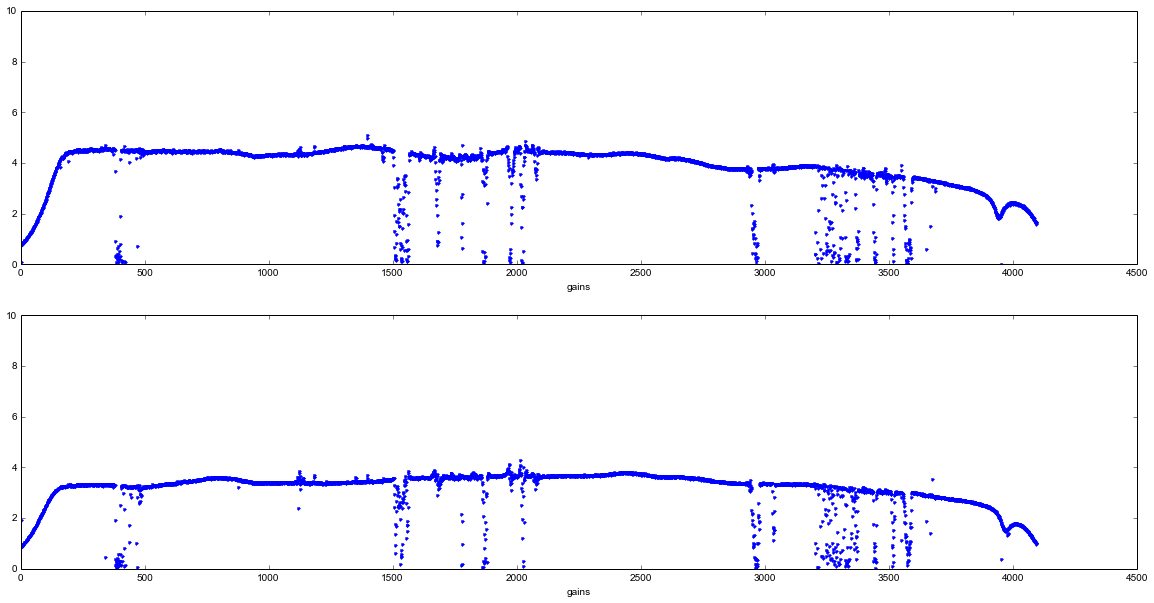

In [62]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

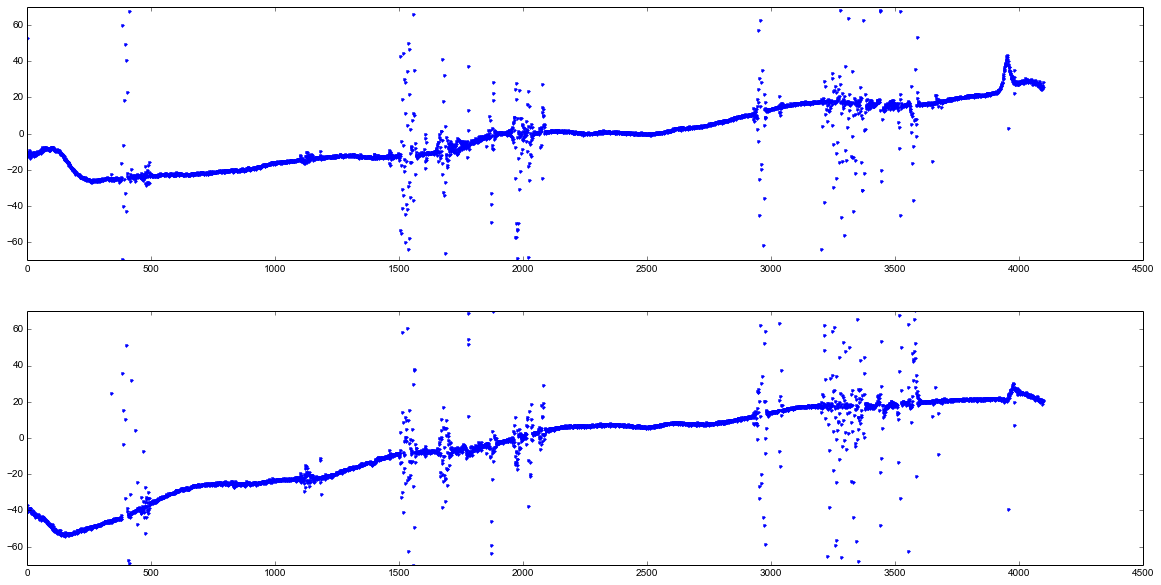

In [63]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);